In [67]:
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import numpy as np
rcParams.update({'errorbar.capsize': 0})
rc('text', usetex=True)
rc('font', size=12)
rc('legend', fontsize=12)
rcParams.update({'font.size':12})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
from altaipony.flarelc import FlareLightCurve
from altaipony.lcio import from_K2SC_source
from altaipony.fakeflares import aflare

In [ ]:
time = np.arange(1000, 1005, 1/86400.)
dur = .015039
ratio = list()
t0range = np.arange(1001.95,1002.03, 1/1800)
for t0 in t0range:
    fl_flux = aflare(time, t0, dur, 20*dur)
    integral_full = np.sum(np.diff(time[::60]) * fl_flux[::60][:-1])
    integral_sampled = np.sum(np.diff(time[::1800]) * fl_flux[::1800][:-1])
    ratio.append(integral_sampled/integral_full)

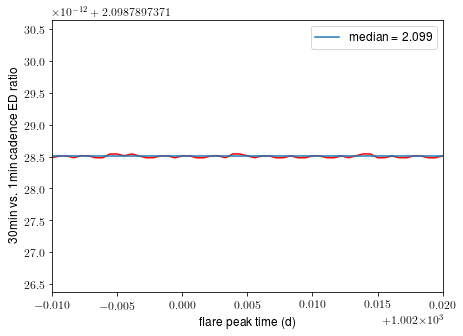

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
ax.plot(t0range, ratio, c='r')
ax.plot(t0range, np.full_like(t0range, np.median(ratio)),
        label='median = {}'.format(np.round(np.median(ratio),3)))
plt.xlim(1001.99,1002.02)
plt.ylabel('30min vs. 1min cadence ED ratio')
plt.xlabel('flare peak time (d)')
plt.legend()

(1001.9, 1002.05)

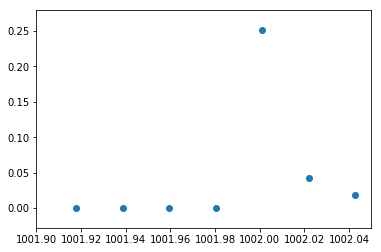

In [23]:
plt.scatter(x,fl_flux)
plt.xlim(1001.9,1002.05)

In [2]:
id_ = 211119999
flc = from_K2SC_source(id_)#
n=10

Starting new HTTPS connection (1): mast.stsci.edu
Found cached file ./mastDownload/K2/k2sc211119999-c04_lc/hlsp_k2sc_k2_llc_211119999-c04_kepler_v2_lc.fits with expected size 478080.
/usr/local/lib/python3.5/dist-packages/astroquery/mast/core.py:1470: ResourceWarning: unclosed <ssl.SSLSocket fd=57, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.0.15', 54626), raddr=('130.167.165.61', 443)>
  self._download_file(dataUrl, localPath, cache=cache)
Starting new HTTPS connection (2): mast.stsci.edu


INFO: Found cached file ./mastDownload/K2/k2sc211119999-c04_lc/hlsp_k2sc_k2_llc_211119999-c04_kepler_v2_lc.fits with expected size 478080. [astroquery.query]


Found cached file ./mastDownload/K2/ktwo211119999-c04_lc/ktwo211119999-c04_llc.fits with expected size 377280.
/usr/local/lib/python3.5/dist-packages/astroquery/mast/core.py:1470: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.0.15', 55450), raddr=('130.167.165.60', 443)>
  self._download_file(dataUrl, localPath, cache=cache)
0 cadences will be ignored (bitmask=0)
0 cadences will be ignored (bitmask=0)


INFO: Found cached file ./mastDownload/K2/ktwo211119999-c04_lc/ktwo211119999-c04_llc.fits with expected size 377280. [astroquery.query]


/home/ekaterina/Documents/Science/AltaiPony/altaipony/lcio.py:193: ResourceWarning: unclosed file <_io.FileIO name='./mastDownload/K2/ktwo211119999-c04_lc/ktwo211119999-c04_llc.fits' mode='rb' closefd=True>
  return from_K2SC_file(path[0], campaign=campaign[0])


In [3]:
data, f = flc.sample_flare_recovery(iterations=300)

100%|#########################################################################|


In [4]:
data.tail(50)


,amplitude,cstart,cstop,duration_d,ed_inj,ed_rec,ed_rec_err,istart,istop,peak_time,tstart,tstop
4955,0.681610,0,0,0.123419,6.343381e+03,4.584507e+03,135094.181318,1559,1569,2262.075190,2262.042980,2262.267728
4956,0.439020,0,0,0.148996,5.210822e+03,3.353224e+03,108591.975316,1606,1615,2263.044988,2263.023699,2263.207583
4957,0.279202,0,0,0.107678,2.406452e+03,1.184981e+03,74715.237236,2206,2210,2275.609314,2275.589130,2275.670856
4958,0.010082,0,0,0.004378,2.345820e+00,5.088659e+01,80276.217625,3180,3184,2297.300560,2297.246615,2297.328341
4959,0.076946,0,0,0.034524,2.085452e+02,0.000000e+00,0.000000,0,0,2269.198571,0.000000,0.000000
4960,0.009833,0,0,0.017093,9.869060e+00,0.000000e+00,0.000000,0,0,2265.010177,0.000000,0.000000
4961,0.007381,0,0,0.021645,1.056860e+01,0.000000e+00,0.000000,0,0,2242.869660,0.000000,0.000000
4962,0.680481,0,0,0.031894,1.800974e+03,0.000000e+00,0.000000,0,0,2250.883554,0.000000,0.000000
4963,0.000179,0,0,0.001298,8.236521e-04,0.000000e+00,0.000000,0,0,2266.179507,0.000000,0.000000
4964,0.000352,0,0,0.001207,1.641608e-03,0.000000e+00,0.000000,0,0,2253.757857,0.000000,0.000000


(0, 100.0)

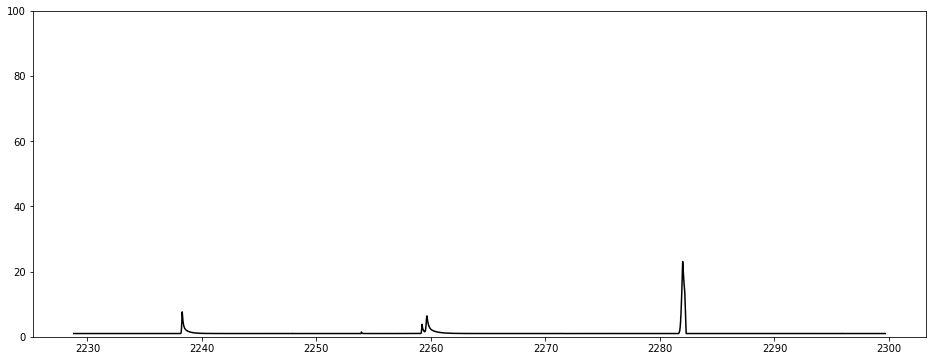

In [5]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(f.time,f.detrended_flux/40000.,c='k')
#ax.plot(f.time,f.detrended_flux*np.median(f.detrended_flux)+np.median(f.detrended_flux),c='r')
plt.ylim(0,1e2) 


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


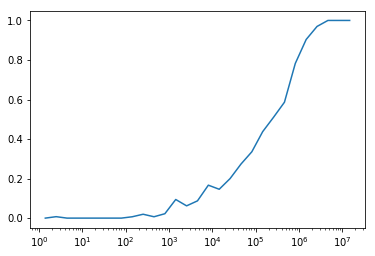

In [8]:
import numpy as np
import pandas as pd

data['rec'] = data.ed_rec.astype(bool).astype(float)

bins = np.logspace(max(np.log10(data.ed_inj.min()), 1e-4),
                   np.log10(data.ed_inj.max()),
                   num=30)
group = data.groupby(pd.cut(data.ed_inj,bins))

rec_prob = pd.DataFrame({'min_ed_inj' : bins[:-1], 
                         'max_ed_inj' : bins[1:], 
                         'mid_ed_inj' : (bins[:-1]+bins[1:])/2.,
                         'rec_prob' : group.rec.sum()/group.ed_inj.count()}).reset_index().drop('ed_inj',axis=1)
plt.plot(rec_prob.mid_ed_inj,rec_prob.rec_prob)
plt.xscale('log')

5005
85


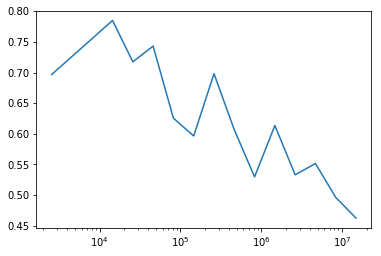

In [7]:

print(data.shape[0])

d = data[data.cstart>0]
d = d[['ed_inj','ed_rec']]
print(d.shape[0])
d['rel']=d.ed_rec/d.ed_inj

group = d.groupby(pd.cut(d.ed_inj,bins))

rec_prob = pd.DataFrame({'min_ed_inj' : bins[:-1], 
                         'max_ed_inj' : bins[1:], 
                         'mid_ed_inj' : (bins[:-1]+bins[1:])/2.,
                         'rel_rec' : group.rel.median()}).reset_index().drop('ed_inj',axis=1).dropna(how='any')
plt.plot(rec_prob.mid_ed_inj,rec_prob.rel_rec)
plt.xscale('log')

In [ ]:
group.ed_inj.count()

In [ ]:
d1.plot(x='ed_inj',y='rel', kind='scatter',loglog=True)

In [ ]:
from matplotlib import rc, rcParams
rcParams.update({'errorbar.capsize': 0})
rc('text', usetex=True)
rc('font', size=11)
rc('legend', fontsize=11)
rcParams.update({'font.size':11})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(flc.time+0.58,flc.detrended_flux+flc.flux_trends-np.nanmedian(flc.flux_trends),c='r')
ax.plot(flc2.time,flc2.flux, c='k')
ax.set_xlim(2253,2255.6)
plt.xlabel('Time (BJD - 2454833 days)')
plt.ylabel(r'Flux (e- s$^{-1}$)')
plt.tight_layout()
plt.savefig('/home/ekaterina/Documents/Science/appaloosa/appaloosa/'
            'stars_shortlist/share/Paper/example_flare.png',dpi=300)